In [17]:
import matplotlib.pyplot as plt
import pickle
from skimage.transform import rotate
from scipy import ndimage
from skimage.util import img_as_ubyte
from joblib import Parallel, delayed
from sklearn.ensemble.forest import _generate_unsampled_indices
from sklearn.ensemble.forest import _generate_sample_indices
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from itertools import product
import seaborn as sns

#import sys
#sys.path.append("../lifelong_learner")
#from lf import LF

%matplotlib inline

In [18]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [28]:
task = range(0,10,1)
ntrees = range(10,300,10)

ntask = len(task)
n_ntrees = len(ntrees)

err = np.zeros((ntask,n_ntrees),dtype=float)

for t in task:
    for count,tree in enumerate(ntrees):
        filename = '../result/task_'+str(t)+'_'+str(tree)
        err[t-1,count] = 1 - unpickle(filename)
        


In [29]:
err

array([[0.351     , 0.38233333, 0.4005    , 0.39883333, 0.403     ,
        0.40633333, 0.4075    , 0.41133333, 0.41416667, 0.41433333,
        0.4145    , 0.41783333, 0.41933333, 0.41866667, 0.41733333,
        0.41766667, 0.41666667, 0.4155    , 0.418     , 0.41733333,
        0.41983333, 0.41916667, 0.41966667, 0.42033333, 0.42      ,
        0.42233333, 0.422     , 0.42066667, 0.42283333],
       [0.46133333, 0.48916667, 0.50016667, 0.49983333, 0.504     ,
        0.50533333, 0.50816667, 0.50916667, 0.5085    , 0.50866667,
        0.50883333, 0.50983333, 0.51233333, 0.51366667, 0.513     ,
        0.51233333, 0.51333333, 0.51416667, 0.51583333, 0.51616667,
        0.5155    , 0.518     , 0.516     , 0.51466667, 0.513     ,
        0.51466667, 0.516     , 0.518     , 0.519     ],
       [0.40066667, 0.43116667, 0.446     , 0.44916667, 0.45366667,
        0.45616667, 0.45816667, 0.4615    , 0.45983333, 0.46283333,
        0.465     , 0.46766667, 0.46916667, 0.46733333, 0.46916667,
  

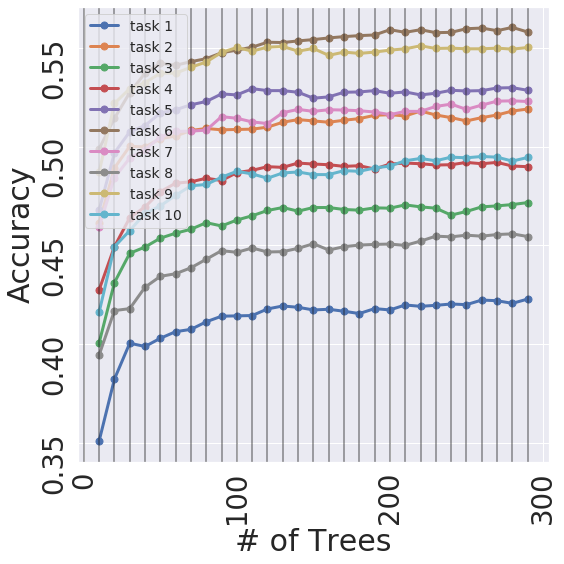

In [30]:
sns.set()

fig, ax = plt.subplots(1,1, figsize=(8,8))

for i in range(10):
    ax.plot(ntrees, err[i,:], marker='.', label = 'task '+str(i+1), markersize=14, linewidth=3)

#ax.set_xticks([100,1000,2000,3000,4000,5000])
#ax.set_yticks([0.9, 1.0, 1.1, 1.2])
#ax.set_ylim(0.89, 1.21)
ax.tick_params(labelsize=27.5,rotation=90)
ax.legend(loc='upper left', fontsize=14)
# ax[0].legend(algos, bbox_to_anchor=(1.2, -.2), loc=2, borderaxespad=0)

ax.set_ylabel('Accuracy', fontsize=30)
ax.set_xlabel('# of Trees', fontsize=30)

#ax.grid(axis='x')

for i in range(0,300,10):
    ax.axvline(x = i, linewidth=1.5,alpha=0.5, color='k')

#ax.axvline(x = 3500, linewidth=3, color='k')

#ax.hlines(0.422, 1,5000, colors='k', linestyles='dashed',linewidth=2)

plt.tight_layout()


plt.savefig('/data/Jayanta/tasks.png',dpi=500)